In [70]:
import numpy as np
import scipy.io as sio
import moviepy as mpy
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
import matplotlib.pyplot as plt

In [ ]:
# Install a pip package in the current Jupyter kernel if package isnt instsalled
import sys
!{sys.executable} -m pip install moviepy

In [82]:
# Load data and define variables 
ds = sio.loadmat('cell_29.mat')['export_struct'][0,0]

trial = np.random.choice(ds['thetaAtBase'].shape[1],1)[0]
x = np.arange(0,len(ds['thetaAtBase']))
amplitude_mask = ds['amplitude'][:,trial]<5
filtered_phase = ds['phase'][:,trial]
filtered_phase[amplitude_mask] = np.nan 
y0 = ds['thetaAtBase'][:,trial]
y1 = ds['amplitude'][:,trial]
y2 = ds['setpoint'][:,trial]
y3 = filtered_phase
y4 = ds['spikes_traces'][:,trial]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4






















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...

















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidden) ...


















 ... (more hidde

                                           









                                             



                                                            


                                                              





                                                     











                                       













                                 














                              















                          
                                                                

                                                                  
















                            






                                                   

















                    




t:   0%|          | 1/3999 [4:06:32<16427:50:06, 14792.45s/it, now=None]










t:   0%|          | 1/160000 [4:02:55<647796:53:24, 14575.52s/it, now=None]












t:   0%|          | 1/156000 [4:02:16<629900:35:34, 14536.26s/it, now=None]





Moviepy - Done !
Moviepy - video ready __temp__.mp4


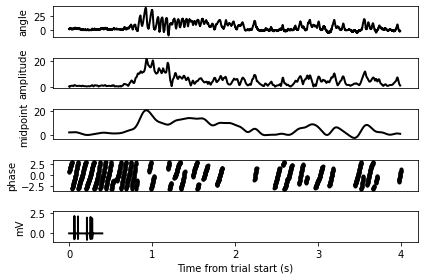

In [85]:
# Set up plots for animation 
fig, ax = plt.subplots(5,1)
l0, = ax[0].plot(x, y0, lw=2, c='k')
l1, = ax[1].plot(x, y1, lw=2, c='k')
l2, = ax[2].plot(x, y2, lw=2, c='k')
l3, = ax[3].plot(x, y3, 'k.')
l4, = ax[4].plot(np.arange(0,len(y4)), y4, lw=2, c='k')

labels = ['angle', 'amplitude', 'midpoint', 'phase', 'mV']
for ix,k in enumerate(ax):
    ax[ix].set_xticks([])
    ax[ix].set_ylabel(labels[ix])
ax[4].set_xticks([0,10000,20000,30000,40000])
ax[4].set_xticklabels([0,1,2,3,4])
ax[4].set_xlabel("Time from trial start (s)")
fig.tight_layout() 

# Animate figure with moviepy 
def plot_until_t(t):
    t_idx = int(round(duration*(t/10)))
    for idx,val in enumerate(ax):
        exec('l' + str(idx) + '.set_xdata(x[:t_idx])')
        exec('l' + str(idx) + '.set_ydata(y' + str(idx) +'[:t_idx])')
    return mplfig_to_npimage(fig)

plotclip = VideoClip(plot_until_t, duration=10)
plotclip.ipython_display(fps=40, loop=True, autoplay=True,progress_bar=False)